In [336]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [337]:
import pandas as pd

file_1 = pd.read_csv("train.csv")
file_2 = pd.read_csv("test.csv")

In [338]:
file_1.isnull().sum()

id                                       0
bank_months_count                   177601
branch_application_count_8weeks          0
credit_risk_score                        0
current_address_months_count          2976
customer_age                             0
date_of_birth_distinct_emails_4w         0
days_since_request                       0
device_distinct_emails_8w              250
device_os                                0
device_previously_fraudulent             0
email_is_free                            0
employment_status                        0
foreign_request                          0
has_other_cards                          0
housing_status                           0
income                                   0
initial_transfer_amount             519650
keep_alive_session                       0
month                                    0
name_email_similarity                    0
payment_type                             0
phone_home_valid                         0
phone_mobil

In [339]:
file_2.isnull().sum()

id                                       0
bank_months_count                    76034
branch_application_count_8weeks          0
credit_risk_score                        0
current_address_months_count          1278
customer_age                             0
date_of_birth_distinct_emails_4w         0
days_since_request                       0
device_distinct_emails_8w              109
device_os                                0
device_previously_fraudulent             0
email_is_free                            0
employment_status                        0
foreign_request                          0
has_other_cards                          0
housing_status                           0
income                                   0
initial_transfer_amount             222873
keep_alive_session                       0
month                                    0
name_email_similarity                    0
payment_type                             0
phone_home_valid                         0
phone_mobil

In [340]:
# 결측치 처리

In [341]:
# device_distinct_emails_8w
# 크게 영향을 끼치지 않을 정도로 결측치 값이 너무 적음. 
# 주로 1과 2 중에서 최빈값인 1로 처리함.

In [342]:
print(file_1[['device_distinct_emails_8w', 'fraud']].corr())

                           device_distinct_emails_8w     fraud
device_distinct_emails_8w                   1.000000  0.037704
fraud                                       0.037704  1.000000


In [343]:
file_1['device_distinct_emails_8w'] = file_1['device_distinct_emails_8w'].fillna(1) # 최빈값인 1로 처리

In [344]:
# session_length_in_minutes
# 평균값으로 대체 

In [345]:
print(file_1[['session_length_in_minutes', 'fraud']].corr())

                           session_length_in_minutes     fraud
session_length_in_minutes                   1.000000  0.009253
fraud                                       0.009253  1.000000


In [346]:
mean_val = file_1['session_length_in_minutes'].mean()
file_1['session_length_in_minutes'] = file_1['session_length_in_minutes'].fillna(mean_val)

In [347]:
# current_address_months_count  
# 중앙값으로 대체

In [348]:
print(file_1[['current_address_months_count', 'fraud']].corr())

                              current_address_months_count     fraud
current_address_months_count                      1.000000  0.033186
fraud                                             0.033186  1.000000


In [349]:
mean_val = file_1['current_address_months_count'].mean()
file_1['current_address_months_count'] = file_1['current_address_months_count'].fillna(mean_val)

In [350]:
# bank_months_count
# 사기인 경우와 사기가 아닌 경우를 나누어, 평균, 표준편차를 구하여 조건부 랜덤 샘플링 기반 결측 대체 방벙블 사용함 

In [351]:
print(file_1[['bank_months_count', 'fraud']].corr())

                   bank_months_count     fraud
bank_months_count           1.000000  0.020829
fraud                       0.020829  1.000000


In [352]:
fraud_mean = file_1[file_1['fraud'] == 1]['bank_months_count'].mean()
nonfraud_mean = file_1[file_1['fraud'] == 0]['bank_months_count'].mean()

print(f"사기인 경우 평균: {fraud_mean:.2f}")
print(f"사기가 아닌 경우 평균: {nonfraud_mean:.2f}")

사기인 경우 평균: 17.33
사기가 아닌 경우 평균: 14.84


In [353]:
fraud_stats = file_1[file_1['fraud'] == 1]['bank_months_count'].agg(['mean', 'std'])
nonfraud_stats = file_1[file_1['fraud'] == 0]['bank_months_count'].agg(['mean', 'std'])

print(f"사기인 경우 → 평균: {fraud_stats['mean']:.2f}, 표준편차: {fraud_stats['std']:.2f}")
print(f"사기 아닌 경우 → 평균: {nonfraud_stats['mean']:.2f}, 표준편차: {nonfraud_stats['std']:.2f}")

사기인 경우 → 평균: 17.33, 표준편차: 11.84
사기 아닌 경우 → 평균: 14.84, 표준편차: 11.52


In [354]:
import numpy as np

cond_missing = file_1['bank_months_count'].isna()

# fraud==1 기준 평균±표준편차
fraud_mean = 17.33
fraud_std = 11.84

# fraud==0 기준 평균±표준편차
nonfraud_mean = 14.84
nonfraud_std = 11.52

# 랜덤 생성 함수
def sample_from_normal(mean, std, size):
    return np.clip(np.random.normal(mean, std, size), 0, None)

# 사기인 경우
fraud_mask = cond_missing & (file_1['fraud'] == 1)
file_1.loc[fraud_mask, 'bank_months_count'] = sample_from_normal(fraud_mean, fraud_std, fraud_mask.sum())

# 사기 아닌 경우
nonfraud_mask = cond_missing & (file_1['fraud'] == 0)
file_1.loc[nonfraud_mask, 'bank_months_count'] = sample_from_normal(nonfraud_mean, nonfraud_std, nonfraud_mask.sum())

In [355]:
# initial_transfer_amount
# 결측치 너무 많아서 그냥 제거

In [356]:
print(file_1[['initial_transfer_amount', 'fraud']].corr())

                         initial_transfer_amount     fraud
initial_transfer_amount                 1.000000  0.014471
fraud                                   0.014471  1.000000


In [357]:
file_1 = file_1.drop(columns=['initial_transfer_amount'])

In [358]:
# prev_address_months_count
# 결측치 너무 많아서 그냥 제거 

In [359]:
print(file_1[['prev_address_months_count', 'fraud']].corr())

                           prev_address_months_count     fraud
prev_address_months_count                   1.000000  0.021867
fraud                                       0.021867  1.000000


In [360]:
file_1 = file_1.drop(columns=['prev_address_months_count'])

In [361]:
file_1.isnull().sum()

id                                  0
bank_months_count                   0
branch_application_count_8weeks     0
credit_risk_score                   0
current_address_months_count        0
customer_age                        0
date_of_birth_distinct_emails_4w    0
days_since_request                  0
device_distinct_emails_8w           0
device_os                           0
device_previously_fraudulent        0
email_is_free                       0
employment_status                   0
foreign_request                     0
has_other_cards                     0
housing_status                      0
income                              0
keep_alive_session                  0
month                               0
name_email_similarity               0
payment_type                        0
phone_home_valid                    0
phone_mobile_valid                  0
requested_credit_limit              0
session_length_in_minutes           0
source                              0
velocity_24h

In [362]:
file_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 31 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                700000 non-null  int64  
 1   bank_months_count                 700000 non-null  float64
 2   branch_application_count_8weeks   700000 non-null  float64
 3   credit_risk_score                 700000 non-null  int64  
 4   current_address_months_count      700000 non-null  float64
 5   customer_age                      700000 non-null  int64  
 6   date_of_birth_distinct_emails_4w  700000 non-null  int64  
 7   days_since_request                700000 non-null  float64
 8   device_distinct_emails_8w         700000 non-null  float64
 9   device_os                         700000 non-null  object 
 10  device_previously_fraudulent      700000 non-null  float64
 11  email_is_free                     700000 non-null  b

In [363]:
# 수치형 컬럼 추출 (id, fraud 제외)
numeric_cols = file_1.select_dtypes(include=['int64', 'float64']).columns.drop(['id', 'fraud'])

In [364]:
print(numeric_cols)

Index(['bank_months_count', 'branch_application_count_8weeks',
       'credit_risk_score', 'current_address_months_count', 'customer_age',
       'date_of_birth_distinct_emails_4w', 'days_since_request',
       'device_distinct_emails_8w', 'device_previously_fraudulent', 'income',
       'month', 'name_email_similarity', 'requested_credit_limit',
       'session_length_in_minutes', 'velocity_24h', 'velocity_4w',
       'velocity_6h', 'zip_count_4w'],
      dtype='object')


[bank_months_count] 이상치 개수: 5 (0.00%)
count    700000.000000
mean         14.996756
std          11.292624
min           0.000000
25%           2.000000
50%          15.000000
75%          26.000000
max          64.452748
Name: bank_months_count, dtype: float64


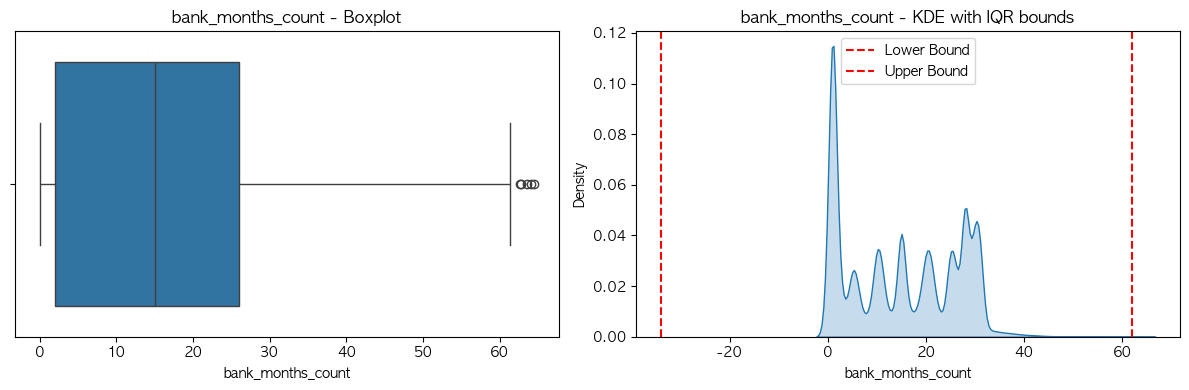

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'bank_months_count'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

In [366]:
# bank_months_count 이상치 그냥 냅두기로함

[branch_application_count_8weeks] 이상치 개수: 122726 (17.53%)
count    700000.000000
mean        184.425411
std         459.681711
min           0.000000
25%           1.000000
50%           9.000000
75%          25.000000
max        2359.000000
Name: branch_application_count_8weeks, dtype: float64


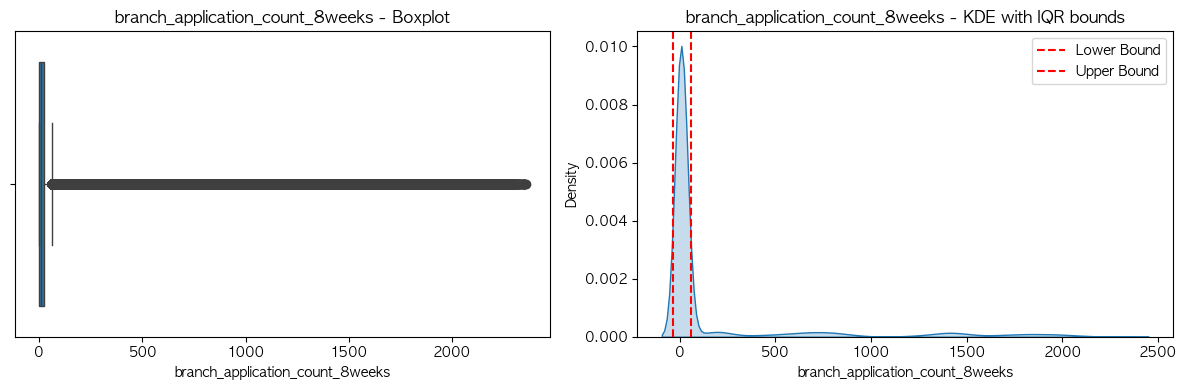

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'branch_application_count_8weeks'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

In [368]:
# 너무 많긴한데,, 컬럼명을 이해를 못하겠음. => 보류하겠습니다.

[credit_risk_score] 이상치 개수: 3698 (0.53%)
count    700000.000000
mean        130.985149
std          69.688134
min        -170.000000
25%          83.000000
50%         122.000000
75%         178.000000
max         389.000000
Name: credit_risk_score, dtype: float64


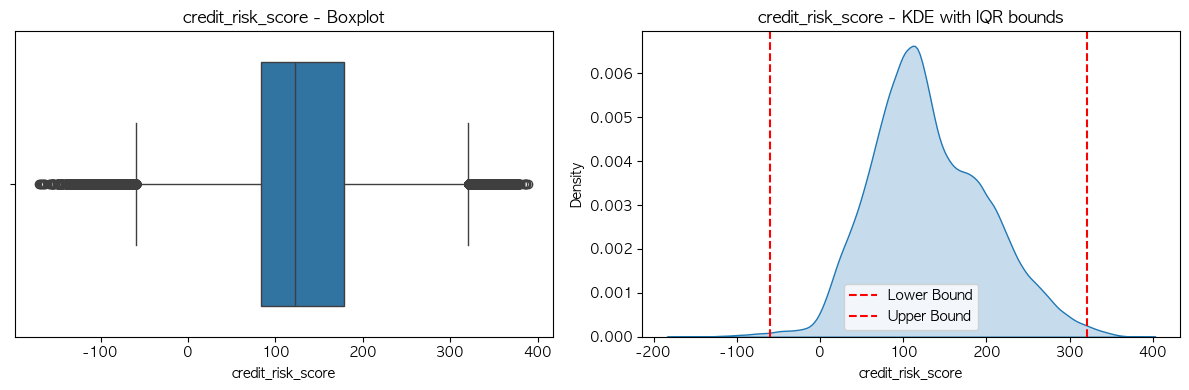

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'credit_risk_score'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

In [370]:
# 이상치 조건은 이미 있음: outliers

# 전체 대비 fraud 비율
total_fraud_rate = file_1['fraud'].mean()

# 이상치 중 fraud 비율
outlier_fraud_rate = outliers['fraud'].mean()

# 이상치 아닌 그룹
inliers = file_1[(file_1[col] >= lower_bound) & (file_1[col] <= upper_bound)]
inlier_fraud_rate = inliers['fraud'].mean()

print(" Fraud 비율 비교:")
print(f"- 전체 fraud 비율: {total_fraud_rate:.4f}")
print(f"- 이상치 그룹 fraud 비율: {outlier_fraud_rate:.4f}")
print(f"- 이상치 아님 그룹 fraud 비율: {inlier_fraud_rate:.4f}")

 Fraud 비율 비교:
- 전체 fraud 비율: 0.0111
- 이상치 그룹 fraud 비율: 0.0635
- 이상치 아님 그룹 fraud 비율: 0.0108


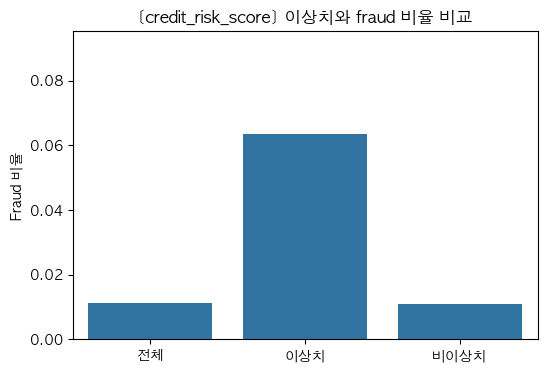

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x=['전체', '이상치', '비이상치'], 
            y=[total_fraud_rate, outlier_fraud_rate, inlier_fraud_rate])

plt.title(f"[{col}] 이상치와 fraud 비율 비교")
plt.ylabel('Fraud 비율')
plt.ylim(0, max(outlier_fraud_rate, inlier_fraud_rate) * 1.5)
plt.show()

In [372]:
# 이상치와 사기와의 연관성이 커 보임. => credit 위험도는 냅두기로 함.

[current_address_months_count] 이상치 개수: 29007 (4.14%)
count    700000.000000
mean         86.918730
std          88.169763
min           0.000000
25%          20.000000
50%          53.000000
75%         130.000000
max         428.000000
Name: current_address_months_count, dtype: float64


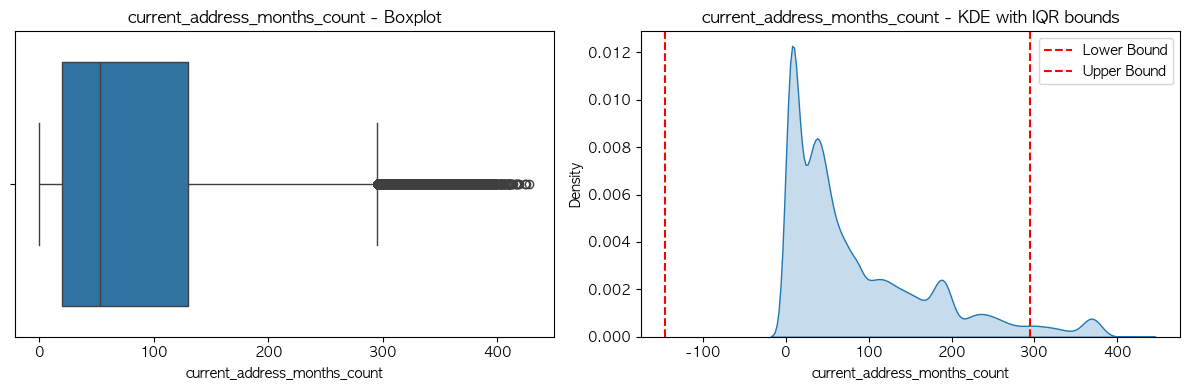

In [373]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'current_address_months_count'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[customer_age] 이상치 개수: 958 (0.14%)
count    700000.000000
mean         33.698871
std          12.023708
min          10.000000
25%          20.000000
50%          30.000000
75%          40.000000
max          90.000000
Name: customer_age, dtype: float64


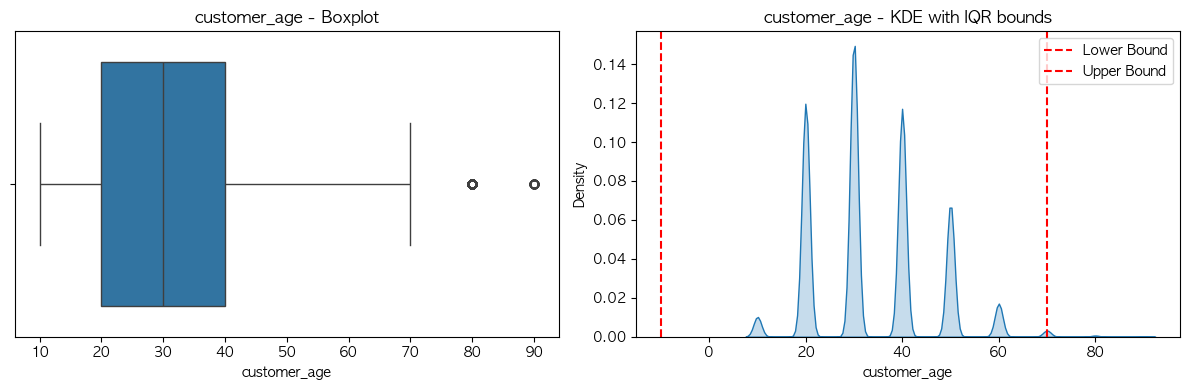

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'customer_age'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

In [375]:
# 이상치 조건은 이미 있음: outliers

# 전체 대비 fraud 비율
total_fraud_rate = file_1['fraud'].mean()

# 이상치 중 fraud 비율
outlier_fraud_rate = outliers['fraud'].mean()

# 이상치 아닌 그룹
inliers = file_1[(file_1[col] >= lower_bound) & (file_1[col] <= upper_bound)]
inlier_fraud_rate = inliers['fraud'].mean()

print(" Fraud 비율 비교:")
print(f"- 전체 fraud 비율: {total_fraud_rate:.4f}")
print(f"- 이상치 그룹 fraud 비율: {outlier_fraud_rate:.4f}")
print(f"- 이상치 아님 그룹 fraud 비율: {inlier_fraud_rate:.4f}")

 Fraud 비율 비교:
- 전체 fraud 비율: 0.0111
- 이상치 그룹 fraud 비율: 0.0522
- 이상치 아님 그룹 fraud 비율: 0.0110


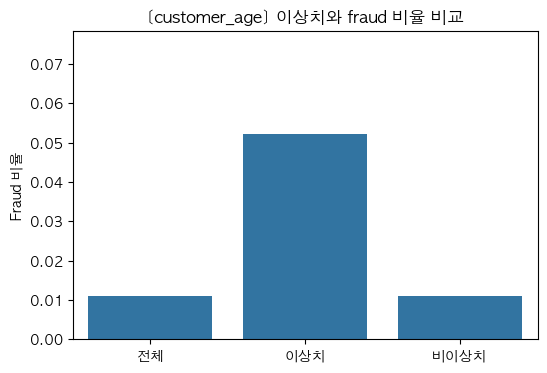

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x=['전체', '이상치', '비이상치'], 
            y=[total_fraud_rate, outlier_fraud_rate, inlier_fraud_rate])

plt.title(f"[{col}] 이상치와 fraud 비율 비교")
plt.ylabel('Fraud 비율')
plt.ylim(0, max(outlier_fraud_rate, inlier_fraud_rate) * 1.5)
plt.show()

[date_of_birth_distinct_emails_4w] 이상치 개수: 6772 (0.97%)
count    700000.000000
mean          9.502097
std           5.033417
min           0.000000
25%           6.000000
50%           9.000000
75%          13.000000
max          39.000000
Name: date_of_birth_distinct_emails_4w, dtype: float64


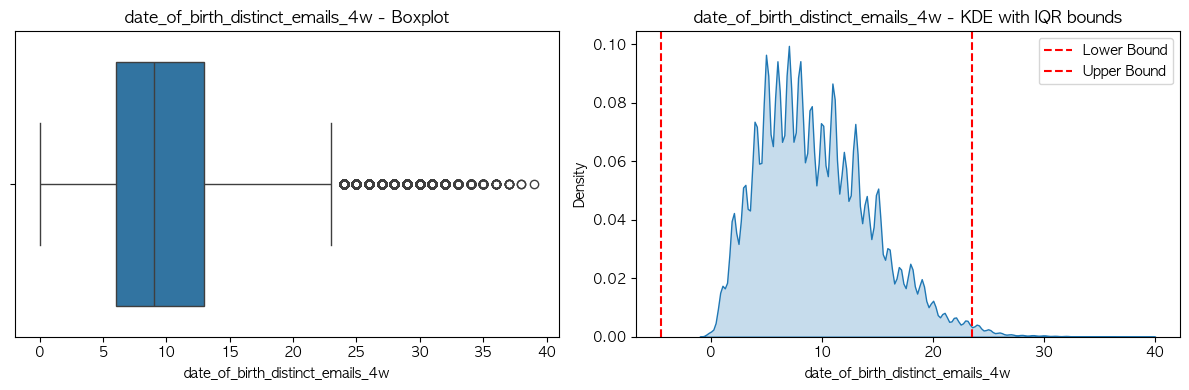

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'date_of_birth_distinct_emails_4w'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

In [378]:
# 이상치 조건은 이미 있음: outliers

# 전체 대비 fraud 비율
total_fraud_rate = file_1['fraud'].mean()

# 이상치 중 fraud 비율
outlier_fraud_rate = outliers['fraud'].mean()

# 이상치 아닌 그룹
inliers = file_1[(file_1[col] >= lower_bound) & (file_1[col] <= upper_bound)]
inlier_fraud_rate = inliers['fraud'].mean()

print(" Fraud 비율 비교:")
print(f"- 전체 fraud 비율: {total_fraud_rate:.4f}")
print(f"- 이상치 그룹 fraud 비율: {outlier_fraud_rate:.4f}")
print(f"- 이상치 아님 그룹 fraud 비율: {inlier_fraud_rate:.4f}")

 Fraud 비율 비교:
- 전체 fraud 비율: 0.0111
- 이상치 그룹 fraud 비율: 0.0056
- 이상치 아님 그룹 fraud 비율: 0.0112


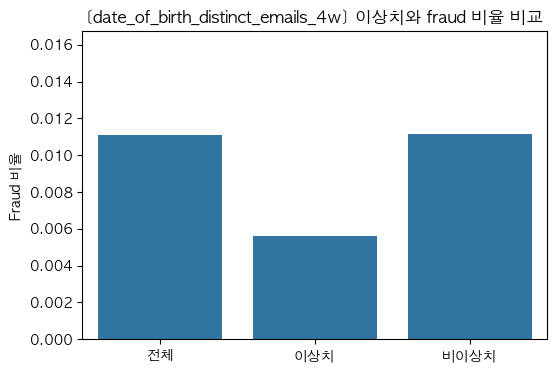

In [379]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x=['전체', '이상치', '비이상치'], 
            y=[total_fraud_rate, outlier_fraud_rate, inlier_fraud_rate])

plt.title(f"[{col}] 이상치와 fraud 비율 비교")
plt.ylabel('Fraud 비율')
plt.ylim(0, max(outlier_fraud_rate, inlier_fraud_rate) * 1.5)
plt.show()

[days_since_request] 이상치 개수: 65619 (9.37%)
count    700000.000000
mean          1.022278
std           5.371060
min           0.000000
25%           0.010000
50%           0.020000
75%           0.030000
max          78.460000
Name: days_since_request, dtype: float64


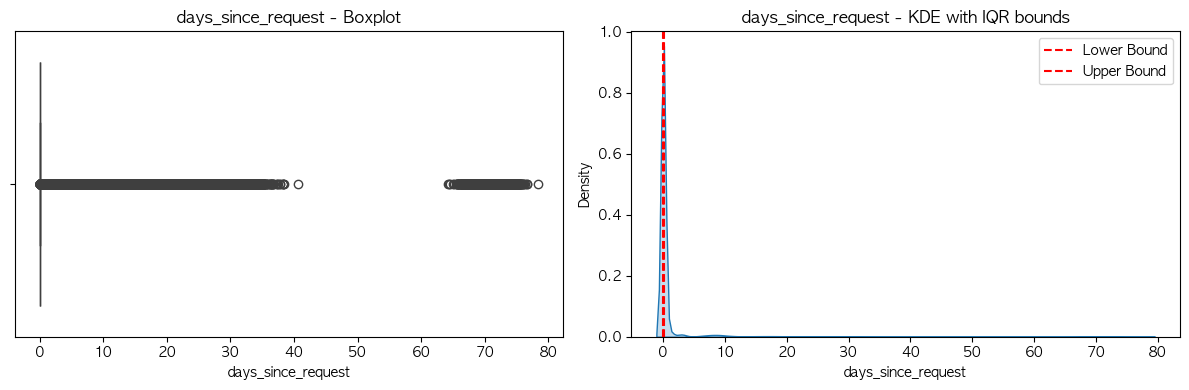

In [380]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'days_since_request'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

In [381]:
# 이상치 조건은 이미 있음: outliers

# 전체 대비 fraud 비율
total_fraud_rate = file_1['fraud'].mean()

# 이상치 중 fraud 비율
outlier_fraud_rate = outliers['fraud'].mean()

# 이상치 아닌 그룹
inliers = file_1[(file_1[col] >= lower_bound) & (file_1[col] <= upper_bound)]
inlier_fraud_rate = inliers['fraud'].mean()

print(" Fraud 비율 비교:")
print(f"- 전체 fraud 비율: {total_fraud_rate:.4f}")
print(f"- 이상치 그룹 fraud 비율: {outlier_fraud_rate:.4f}")
print(f"- 이상치 아님 그룹 fraud 비율: {inlier_fraud_rate:.4f}")

 Fraud 비율 비교:
- 전체 fraud 비율: 0.0111
- 이상치 그룹 fraud 비율: 0.0134
- 이상치 아님 그룹 fraud 비율: 0.0109


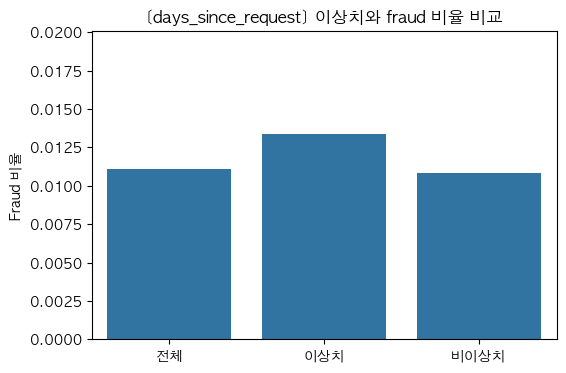

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x=['전체', '이상치', '비이상치'], 
            y=[total_fraud_rate, outlier_fraud_rate, inlier_fraud_rate])

plt.title(f"[{col}] 이상치와 fraud 비율 비교")
plt.ylabel('Fraud 비율')
plt.ylim(0, max(outlier_fraud_rate, inlier_fraud_rate) * 1.5)
plt.show()

[device_distinct_emails_8w] 이상치 개수: 22174 (3.17%)
count    700000.000000
mean          1.019146
std           0.176948
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: device_distinct_emails_8w, dtype: float64


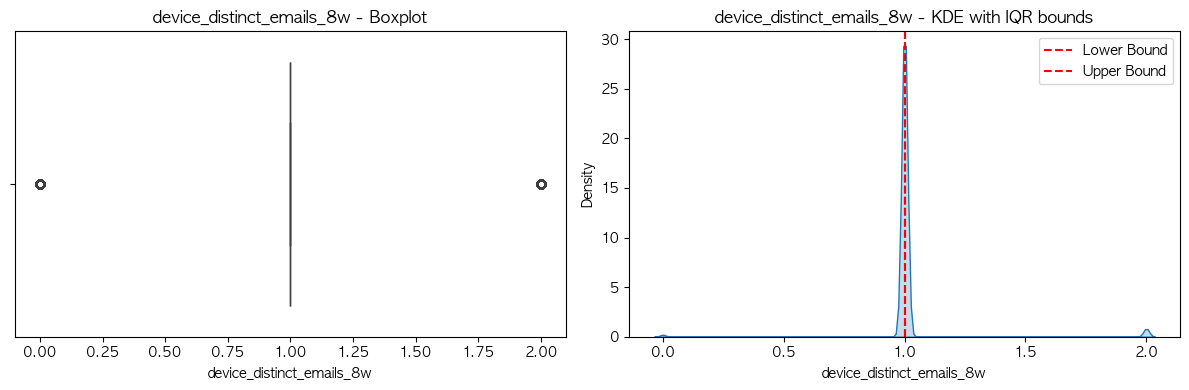

In [383]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'device_distinct_emails_8w'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[device_previously_fraudulent] 이상치 개수: 0 (0.00%)
count    700000.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: device_previously_fraudulent, dtype: float64


/var/folders/k4/2cwjxcv173qbr_dkvpq42vdm0000gn/T/ipykernel_49760/399464794.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=file_1, x=col, fill=True)


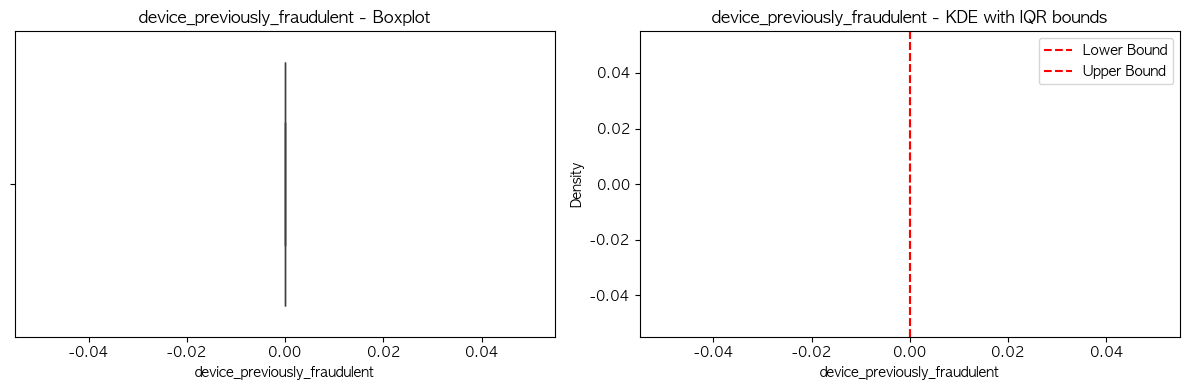

In [384]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'device_previously_fraudulent'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[income] 이상치 개수: 0 (0.00%)
count    700000.000000
mean          0.562526
std           0.290355
min           0.100000
25%           0.300000
50%           0.600000
75%           0.800000
max           0.900000
Name: income, dtype: float64


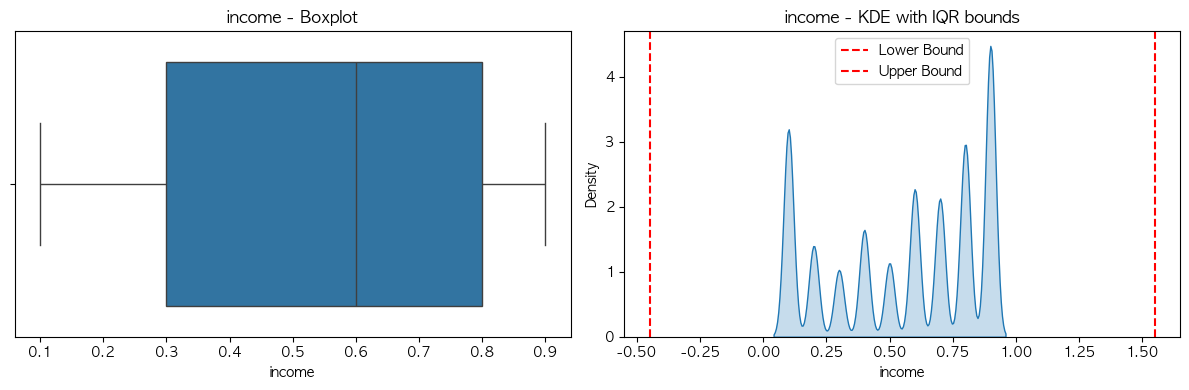

In [385]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'income'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[month] 이상치 개수: 0 (0.00%)
count    700000.000000
mean          3.288677
std           2.210689
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           7.000000
Name: month, dtype: float64


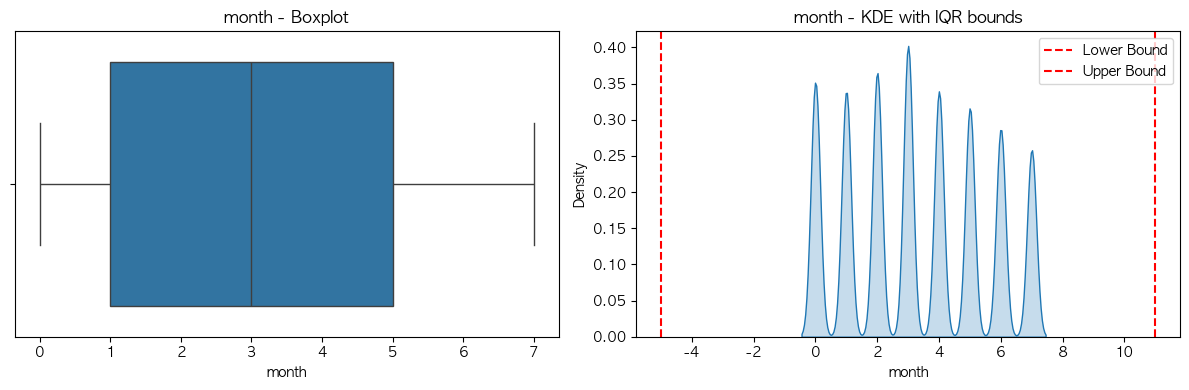

In [386]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'month'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[name_email_similarity] 이상치 개수: 0 (0.00%)
count    700000.000000
mean          0.493821
std           0.289246
min           0.000001
25%           0.225204
50%           0.492449
75%           0.755689
max           0.999999
Name: name_email_similarity, dtype: float64


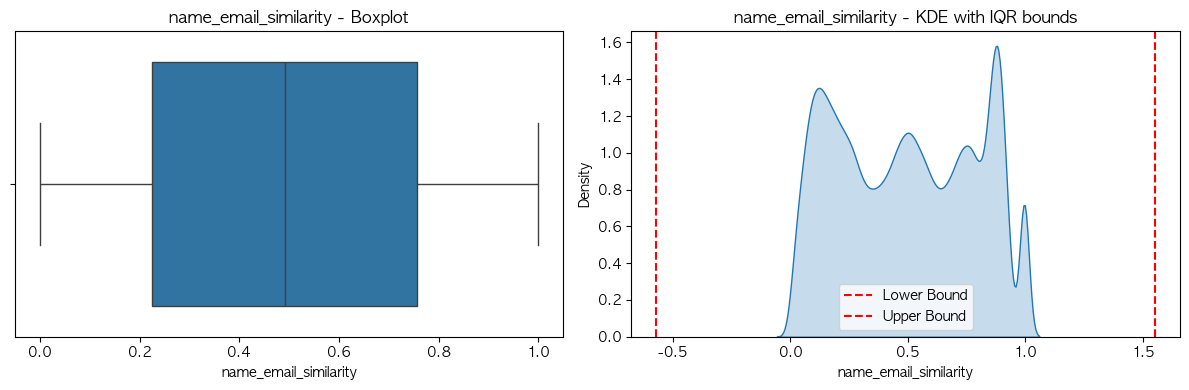

In [387]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'name_email_similarity'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[requested_credit_limit] 이상치 개수: 169191 (24.17%)
count    700000.000000
mean        515.683129
std         487.416650
min         190.000000
25%         200.000000
50%         200.000000
75%         500.000000
max        2100.000000
Name: requested_credit_limit, dtype: float64


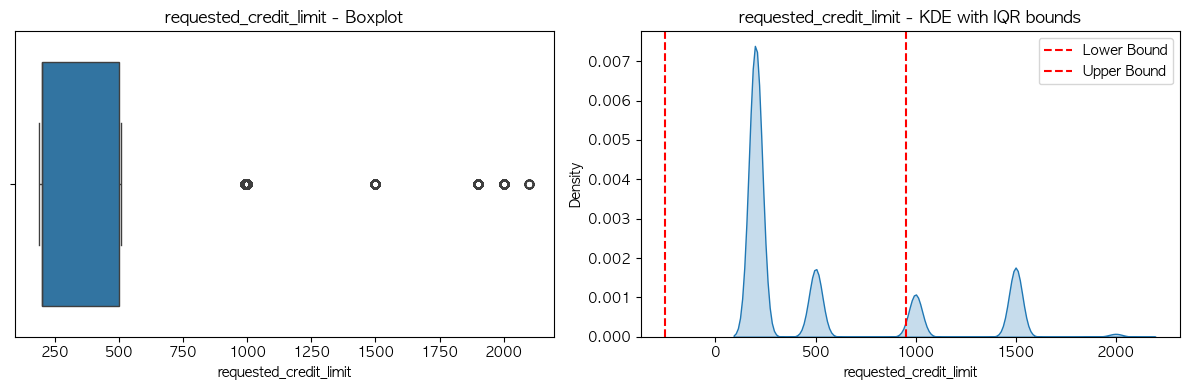

In [388]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'requested_credit_limit'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[session_length_in_minutes] 이상치 개수: 54325 (7.76%)
count    700000.000000
mean          7.564633
std           8.029315
min           0.000000
25%           3.100000
50%           5.100000
75%           8.900000
max          85.900000
Name: session_length_in_minutes, dtype: float64


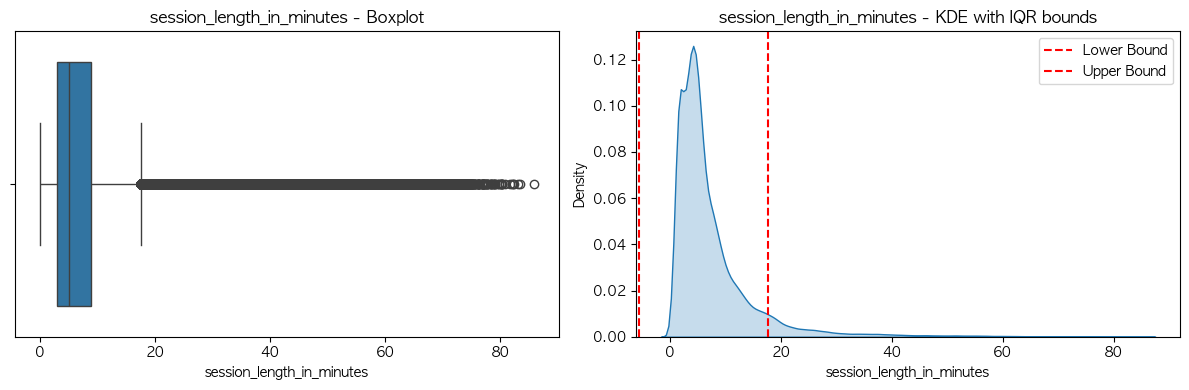

In [389]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'session_length_in_minutes'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

In [390]:
bins = [0, 300, 700, 1100, 1600, 2200]
labels = ['≤300', '301–700', '701–1100', '1101–1600', '1601+']

In [391]:
# 구간화
file_1['credit_limit_bin'] = pd.cut(file_1['requested_credit_limit'], bins=bins, labels=labels, include_lowest=True)

# 구간별 fraud 비율 계산
fraud_by_bin = file_1.groupby('credit_limit_bin')['fraud'].agg(['count', 'mean']).rename(columns={'mean': 'fraud_rate'})

print(fraud_by_bin)

                   count  fraud_rate
credit_limit_bin                    
≤300              430372    0.007377
301–700           100437    0.010265
701–1100           62697    0.011213
1101–1600         101936    0.022122
1601+               4558    0.132953


/var/folders/k4/2cwjxcv173qbr_dkvpq42vdm0000gn/T/ipykernel_49760/2227218513.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_bin = file_1.groupby('credit_limit_bin')['fraud'].agg(['count', 'mean']).rename(columns={'mean': 'fraud_rate'})


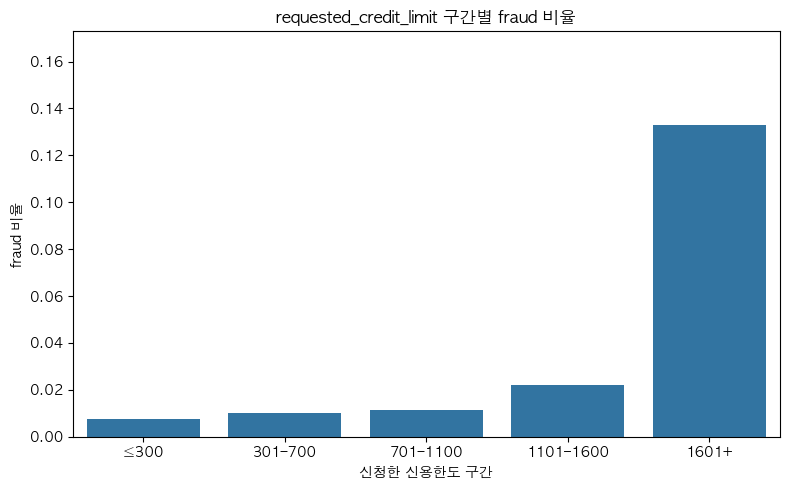

In [392]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_by_bin.index, y=fraud_by_bin['fraud_rate'])
plt.title('requested_credit_limit 구간별 fraud 비율')
plt.xlabel('신청한 신용한도 구간')
plt.ylabel('fraud 비율')
plt.ylim(0, fraud_by_bin['fraud_rate'].max() * 1.3)
plt.tight_layout()
plt.show()

In [393]:
# 이상치 조건은 이미 있음: outliers

# 전체 대비 fraud 비율
total_fraud_rate = file_1['fraud'].mean()

# 이상치 중 fraud 비율
outlier_fraud_rate = outliers['fraud'].mean()

# 이상치 아닌 그룹
inliers = file_1[(file_1[col] >= lower_bound) & (file_1[col] <= upper_bound)]
inlier_fraud_rate = inliers['fraud'].mean()

print(" Fraud 비율 비교:")
print(f"- 전체 fraud 비율: {total_fraud_rate:.4f}")
print(f"- 이상치 그룹 fraud 비율: {outlier_fraud_rate:.4f}")
print(f"- 이상치 아님 그룹 fraud 비율: {inlier_fraud_rate:.4f}")

 Fraud 비율 비교:
- 전체 fraud 비율: 0.0111
- 이상치 그룹 fraud 비율: 0.0148
- 이상치 아님 그룹 fraud 비율: 0.0108


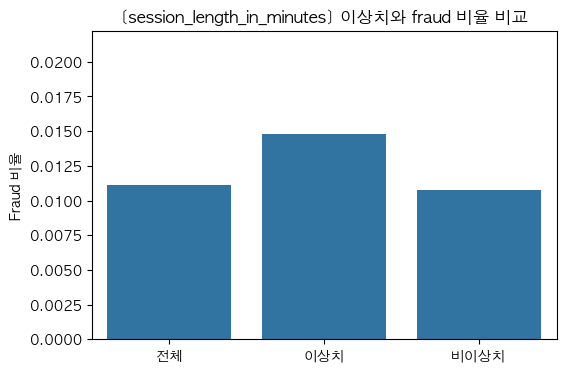

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x=['전체', '이상치', '비이상치'], 
            y=[total_fraud_rate, outlier_fraud_rate, inlier_fraud_rate])

plt.title(f"[{col}] 이상치와 fraud 비율 비교")
plt.ylabel('Fraud 비율')
plt.ylim(0, max(outlier_fraud_rate, inlier_fraud_rate) * 1.5)
plt.show()

[velocity_24h] 이상치 개수: 2115 (0.30%)
count    700000.000000
mean       4768.535676
std        1478.556133
min        1324.790000
25%        3594.017500
50%        4748.815000
75%        5749.762500
max        9506.900000
Name: velocity_24h, dtype: float64


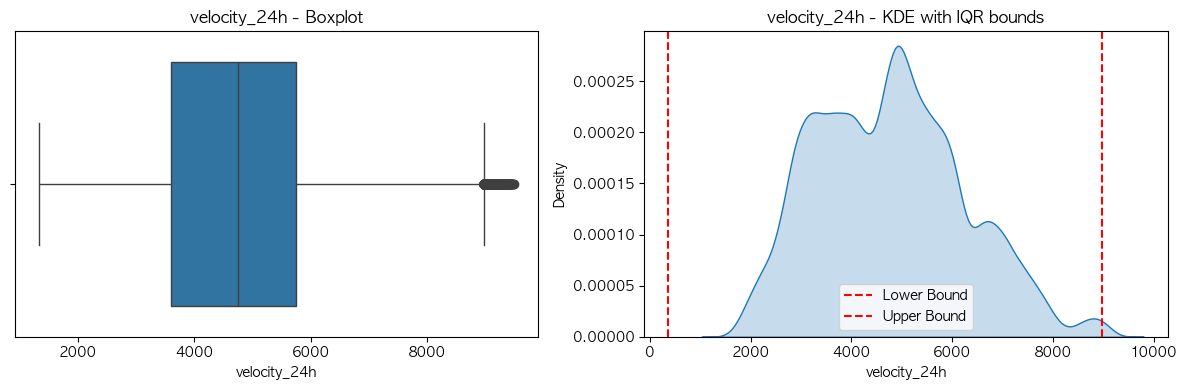

In [395]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'velocity_24h'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[velocity_4w] 이상치 개수: 0 (0.00%)
count    700000.000000
mean       4856.505326
std         920.225230
min        2863.780000
25%        4268.360000
50%        4914.260000
75%        5488.990000
max        6966.170000
Name: velocity_4w, dtype: float64


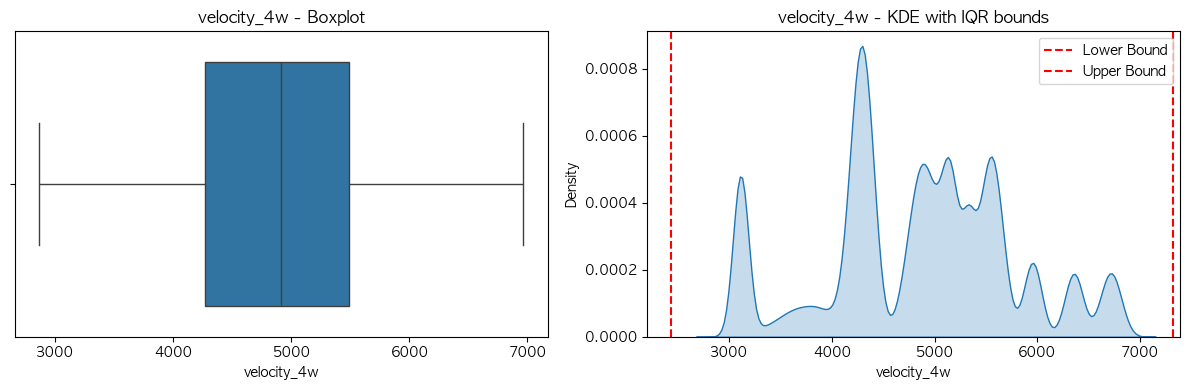

In [396]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'velocity_4w'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[velocity_6h] 이상치 개수: 6362 (0.91%)
count    700000.000000
mean       5666.900116
std        3009.598602
min        -170.600000
25%        3438.385000
50%        5318.765000
75%        7681.112500
max       16715.570000
Name: velocity_6h, dtype: float64


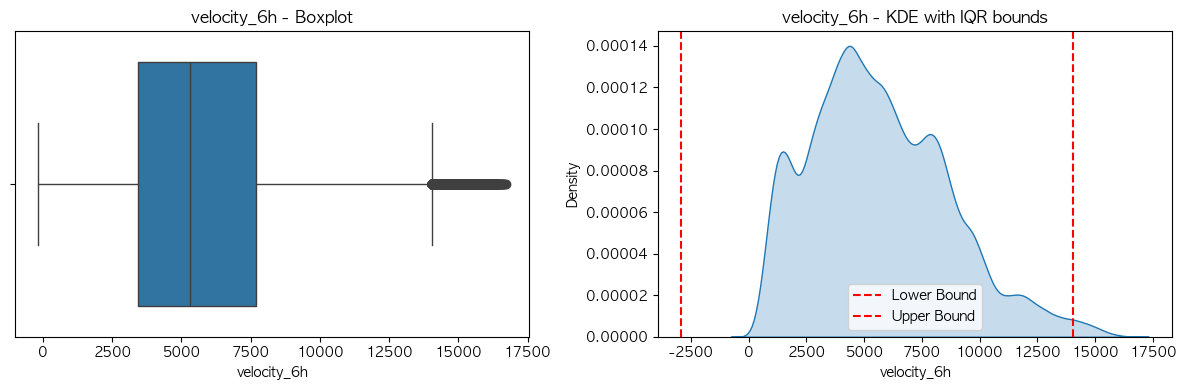

In [397]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'velocity_6h'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

[zip_count_4w] 이상치 개수: 41710 (5.96%)
count    700000.000000
mean       1573.321961
std        1005.793121
min           2.000000
25%         894.000000
50%        1263.000000
75%        1946.000000
max        6700.000000
Name: zip_count_4w, dtype: float64


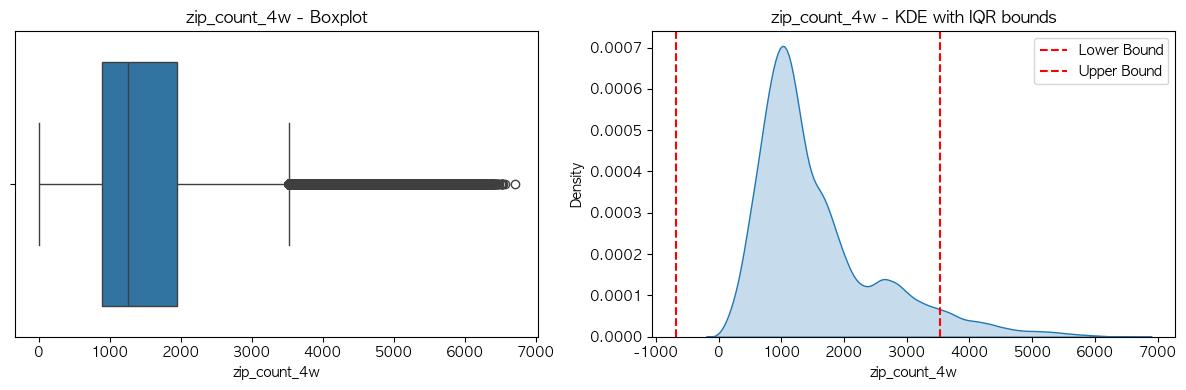

In [398]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'zip_count_4w'  # ← 여기만 바꿔주면 됨

# IQR 기준
q1 = file_1[col].quantile(0.25)
q3 = file_1[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 조건
outliers = file_1[(file_1[col] < lower_bound) | (file_1[col] > upper_bound)]

# 수치 요약
print(f"[{col}] 이상치 개수: {len(outliers)} ({len(outliers)/len(file_1)*100:.2f}%)")
print(file_1[col].describe())

# 시각화
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=file_1[col])
plt.title(f"{col} - Boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=file_1, x=col, fill=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title(f"{col} - KDE with IQR bounds")
plt.legend()

plt.tight_layout()
plt.show()

In [399]:
file_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   id                                700000 non-null  int64   
 1   bank_months_count                 700000 non-null  float64 
 2   branch_application_count_8weeks   700000 non-null  float64 
 3   credit_risk_score                 700000 non-null  int64   
 4   current_address_months_count      700000 non-null  float64 
 5   customer_age                      700000 non-null  int64   
 6   date_of_birth_distinct_emails_4w  700000 non-null  int64   
 7   days_since_request                700000 non-null  float64 
 8   device_distinct_emails_8w         700000 non-null  float64 
 9   device_os                         700000 non-null  object  
 10  device_previously_fraudulent      700000 non-null  float64 
 11  email_is_free                     70000

In [400]:
# 인코딩

In [401]:
#device_os object 5 linux, windows 등 One-Hot OS 간 서열 없음
#employment_status object ~6 employed, retired 등 One-Hot 명목형, 비교 불가능
#housing_status object ~6 own, rent 등 One-Hot 명목형, 의미 없음
#payment_type object ~6 card, cash 등 One-Hot 명목형
#source object 2 INTERNET, TELEAPP Binary Encoding 또는 One-Hot 2개라면 binary 가능
#email_is_free bool 2 True / False 0/1 매핑 (그대로 사용) 이진 변수
#foreign_request bool 2 True / False 0/1 매핑 (그대로 사용) 이진 변수
#has_other_cards bool 2 True / False 0/1 매핑 (그대로 사용) 이진 변수
#keep_alive_session bool 2 True / False 0/1 매핑 (그대로 사용) 이진 변수
#phone_home_valid bool 2 True / False 0/1 매핑 (그대로 사용) 이진 변수
# phone_mobile_valid bool 2 True / False 0/1 매핑 (그대로 사용) 이진 변수

In [402]:
print(file_1.columns)

Index(['id', 'bank_months_count', 'branch_application_count_8weeks',
       'credit_risk_score', 'current_address_months_count', 'customer_age',
       'date_of_birth_distinct_emails_4w', 'days_since_request',
       'device_distinct_emails_8w', 'device_os',
       'device_previously_fraudulent', 'email_is_free', 'employment_status',
       'foreign_request', 'has_other_cards', 'housing_status', 'income',
       'keep_alive_session', 'month', 'name_email_similarity', 'payment_type',
       'phone_home_valid', 'phone_mobile_valid', 'requested_credit_limit',
       'session_length_in_minutes', 'source', 'velocity_24h', 'velocity_4w',
       'velocity_6h', 'zip_count_4w', 'fraud', 'credit_limit_bin'],
      dtype='object')


In [403]:
# One-Hot Encoding 대상 (drop_first=True로 다중공선성 방지)
onehot_cols = ['device_os', 'employment_status', 'housing_status', 'payment_type']

# Binary Encoding 대상
binary_map = {'INTERNET': 0, 'TELEAPP': 1}

# 1. One-Hot 인코딩
file_1 = pd.get_dummies(file_1, columns=onehot_cols, drop_first=True)

# 2. Binary 인코딩 (source)
file_1['source'] = file_1['source'].map(binary_map)

# 3. Boolean 컬럼은 이미 0/1 형태이므로 변환 불필요
# 단, 필요시 int로 명확히 변환하고 싶다면 아래처럼도 가능
bool_cols = ['email_is_free', 'foreign_request', 'has_other_cards',
             'keep_alive_session', 'phone_home_valid', 'phone_mobile_valid']

file_1[bool_cols] = file_1[bool_cols].astype(int)

In [404]:
# undersampling 적용
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# X, y 분리 (이전에 인코딩 완료된 상태에서)
X = file_1.drop(['id', 'fraud'], axis=1)
y = file_1['fraud']

# 언더샘플링
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# 결과 확인
print("Before:", Counter(y))
print("After:", Counter(y_res))

Before: Counter({0: 692230, 1: 7770})
After: Counter({0: 7770, 1: 7770})


In [405]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

In [409]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# credit_limit_bin 컬럼이 남아있을 수 있으니 안전하게 제거
X_train = X_train.drop(columns=['credit_limit_bin'], errors='ignore')
X_test = X_test.drop(columns=['credit_limit_bin'], errors='ignore')

# 모델 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Confusion Matrix:
[[1085  469]
 [ 551 1003]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6632    0.6982    0.6803      1554
           1     0.6814    0.6454    0.6629      1554

    accuracy                         0.6718      3108
   macro avg     0.6723    0.6718    0.6716      3108
weighted avg     0.6723    0.6718    0.6716      3108



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [407]:
print('credit_limit_bin' in X_train.columns)  # → False여야 정상

True


In [413]:
# ✅ credit_limit_bin 제거
X = file_1.drop(columns=['id', 'fraud', 'credit_limit_bin'], errors='ignore')

# ✅ 숫자형 컬럼만 선택
X = X.select_dtypes(include=['int64', 'float64'])

# y는 그대로
y = file_1['fraud']

In [415]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# train/test split (SMOTE는 train에만)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_res))

Before SMOTE: Counter({0: 553784, 1: 6216})
After SMOTE: Counter({0: 553784, 1: 553784})


In [417]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_res, y_res)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 평가 지표 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Confusion Matrix:
[[103714  34732]
 [   595    959]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9943    0.7491    0.8545    138446
           1     0.0269    0.6171    0.0515      1554

    accuracy                         0.7477    140000
   macro avg     0.5106    0.6831    0.4530    140000
weighted avg     0.9836    0.7477    0.8456    140000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
